In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets
from torch.utils.data import DataLoader
import numpy
from tqdm import tqdm

/home/polina/anaconda3/envs/ds/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.cuda.is_available()

True

In [3]:
#hyper params
num_epoch = 20
cuda_device = 0
batch_size = 140
device = f'cuda:{cuda_device}' if cuda_device != -1 else 'cpu'
input_d = 28*28
hidden_d = 512
out_d = 10

In [4]:
#model
class MyModel(nn.Module):
    def __init__(self,
                 input_dim: int,
                 hidden_dim: int,
                 out_dim: int,
                 ):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim, bias=True)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim, bias=True)
        self.linear3 = nn.Linear(hidden_dim, out_dim)

        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.linear1(x))
        x = self.activation(self.linear2(x))
        x = self.activation(self.linear3(x))

        return x

In [5]:
def collate_fn(data):
    pics = []
    targets = []
    # data = [(pic, target), ....]
    for item in data:
        pics.append(numpy.array(item[0]))
        targets.append(item[1])

    return {
        'data': torch.from_numpy(numpy.array(pics)) / 255,
        'target': torch.from_numpy(numpy.array(targets))
    }

In [6]:
# init model
model = MyModel(input_d, hidden_d, out_d)
model = model.to(device)

In [7]:
#optimizer
optim = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:
#dataset
dataset = datasets.MNIST('../dataset/', download=False)

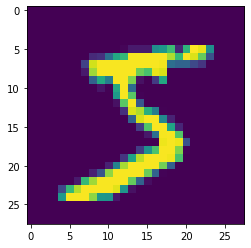

In [9]:
import matplotlib.pyplot as plt
plt.imshow(dataset.data[0].detach().numpy())
plt.show()

In [10]:
#loss
criterion = nn.CrossEntropyLoss()

In [11]:
# train loop
for epoch in tqdm(range(num_epoch)):
    #dataloder
    data_loader = DataLoader(dataset=dataset,
                             batch_size=batch_size,
                             shuffle=True,
                             collate_fn=collate_fn,
                             drop_last=True,
                             )
    for i, batch in enumerate(data_loader):
        optim.zero_grad()
        data = batch['data'].to(device).float()
        predict = model(data.view(data.size(0), -1))
        loss = criterion(predict, batch['target'].to(device))
        loss.backward()
        optim.step()
        if i % 100:
            print(loss)

  0%|          | 0/20 [00:00<?, ?it/s]

tensor(2.2747, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2221, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1895, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.0915, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9917, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9150, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8160, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.7013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5751, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.6634, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.7944, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5978, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5086, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.7329, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3984, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3504, device='cuda:0', grad_fn=

  5%|▌         | 1/20 [00:02<00:39,  2.10s/it]

tensor(0.9771, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0282, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2367, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8259, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7156, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8758, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9441, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9469, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9118, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9524, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0225, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0055, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0816, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9457, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7980, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0947, device='cuda:0', grad_fn=

 10%|█         | 2/20 [00:03<00:32,  1.82s/it]

tensor(0.9458, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0742, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0680, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1329, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9270, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8241, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0121, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0865, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0234, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0268, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0721, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7890, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8893, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0977, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9500, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8147, device='cuda:0', grad_fn=

 15%|█▌        | 3/20 [00:05<00:28,  1.68s/it]

tensor(0.7839, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8838, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1129, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9119, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8853, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3711, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7966, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1433, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9205, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9294, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8574, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0806, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9308, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9455, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9363, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8433, device='cuda:0', grad_fn=

 20%|██        | 4/20 [00:06<00:25,  1.62s/it]

tensor(0.9164, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8685, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0903, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9423, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8464, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9140, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9573, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0849, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8409, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0136, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9306, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7609, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9045, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8663, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9366, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9577, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8976, device='cuda:0', grad_fn=

 25%|██▌       | 5/20 [00:08<00:23,  1.57s/it]

tensor(0.8998, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8357, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9462, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9910, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9144, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9403, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8331, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1263, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0773, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8753, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9668, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8581, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8964, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9307, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0333, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0186, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1560, device='cuda:0', grad_fn=

 30%|███       | 6/20 [00:09<00:21,  1.55s/it]

tensor(0.9745, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9749, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0414, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7917, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0281, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0800, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8702, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9893, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8814, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9777, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0739, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0726, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9275, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9460, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8974, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8869, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8205, device='cuda:0', grad_fn=

 35%|███▌      | 7/20 [00:11<00:19,  1.54s/it]

tensor(0.9242, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9582, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0160, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9117, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9585, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8379, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9224, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0178, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0174, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8704, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9658, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0470, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0674, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9581, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0882, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9121, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7901, device='cuda:0', grad_fn=

 40%|████      | 8/20 [00:12<00:18,  1.54s/it]

tensor(0.7652, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8091, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9389, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1463, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9973, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7653, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0122, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9401, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7610, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8690, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8604, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8798, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9519, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8609, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8081, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8563, device='cuda:0', grad_fn=

 45%|████▌     | 9/20 [00:14<00:16,  1.54s/it]

tensor(1.0373, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0188, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7598, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7913, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8075, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9149, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9708, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8133, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9419, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8476, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9136, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9574, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9383, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0384, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0209, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9961, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9966, device='cuda:0', grad_fn=

 50%|█████     | 10/20 [00:15<00:15,  1.53s/it]

tensor(0.7784, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8349, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9217, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0878, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8277, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8687, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8650, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9518, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8499, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9055, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8333, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0203, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9098, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8056, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9729, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8950, device='cuda:0', grad_fn=

 55%|█████▌    | 11/20 [00:17<00:13,  1.52s/it]

tensor(0.9458, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0718, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9483, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8388, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9583, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9685, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9119, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9787, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0541, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0481, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9577, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8580, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1243, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0379, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9543, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8568, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9841, device='cuda:0', grad_fn=

 60%|██████    | 12/20 [00:18<00:12,  1.52s/it]

tensor(1.0876, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7240, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8934, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9520, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9223, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8994, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8931, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9406, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9857, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0315, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9564, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7641, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7578, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9393, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8267, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8204, device='cuda:0', grad_fn=

 65%|██████▌   | 13/20 [00:20<00:10,  1.55s/it]

tensor(1.0368, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0588, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7418, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2201, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9047, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8434, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7297, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7620, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0534, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9628, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0212, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8731, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1370, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1728, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8746, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9214, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9377, device='cuda:0', grad_fn=

 70%|███████   | 14/20 [00:22<00:09,  1.55s/it]

tensor(0.8807, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0242, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8917, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8229, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8451, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0194, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7588, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8768, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8718, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8309, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1091, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9856, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0369, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9132, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8815, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9383, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9719, device='cuda:0', grad_fn=

 75%|███████▌  | 15/20 [00:23<00:07,  1.53s/it]

tensor(0.8074, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0253, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9742, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9309, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1211, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7078, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8722, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0379, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8720, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7098, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9906, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9869, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9213, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9247, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8719, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8864, device='cuda:0', grad_fn=

 80%|████████  | 16/20 [00:25<00:06,  1.53s/it]

tensor(0.9881, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8886, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9425, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9597, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9868, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9135, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0074, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9141, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8940, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8733, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7249, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8882, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8887, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7732, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9958, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9213, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8225, device='cuda:0', grad_fn=

 85%|████████▌ | 17/20 [00:26<00:04,  1.52s/it]

tensor(0.9380, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7499, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9375, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9387, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8096, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8434, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7827, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8609, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0536, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9212, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0530, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6762, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9909, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8837, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8762, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0407, device='cuda:0', grad_fn=

 90%|█████████ | 18/20 [00:27<00:03,  1.50s/it]

tensor(1.1375, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8883, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9391, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7521, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9704, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0426, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8757, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9959, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9238, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9255, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8062, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9541, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9869, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8067, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0056, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8807, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8884, device='cuda:0', grad_fn=

 95%|█████████▌| 19/20 [00:29<00:01,  1.51s/it]

tensor(0.8120, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9871, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9047, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8227, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8881, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9403, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1690, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9064, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9211, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9540, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9845, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9540, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9375, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8602, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8388, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8553, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8062, device='cuda:0', grad_fn=

100%|██████████| 20/20 [00:31<00:00,  1.55s/it]

tensor(0.8585, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9724, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9585, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8474, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8718, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9190, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9573, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8725, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8438, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9305, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9108, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9540, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9863, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8490, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9409, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9228, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7731, device='cuda:0', grad_fn=

In [12]:
torch.save(model.state_dict(), 'full_model.pt')